# Ejercicio 6

In [1]:
from random import (random, seed)

## 6I

In [2]:
def var_tinv(probs : dict):
    ''' Implementacion usando transformacion invertida \n
        Optimizamos el numero de busquedas ordenando las probabilidades individuales de mayor a menor
    '''
    u = random()
    f = 0
    for k, v in probs.items():
        f += v
        if u <= f:
            return k

## 6II

In [3]:
def binom_probs(n,p):
    py = []
    prob = (1-p)**n
    py.append(prob)
    for j in range(4):
        prob *= (n-j)/(j+1)
        prob *= p/(1-p)
        py.append(prob)
    return py

def bin_inv(n,p):
    c = p / (1-p)
    prob = (1-p)**n
    f, i = prob, 0
    u = random()
    while f <= u:
        prob *= c * (n-i) / (i+1)
        f += prob
        i += 1 
    return i

def var_rech(px : list):
    ''' implementacion usando el metodo de rechazo
    '''
    ret = None
    py = binom_probs(4,0.45)
    c = max(px) / min(py)
    while ret is None:
        y = bin_inv(4,0.45)
        valid = random() < px[y] / (c * py[y])
        ret = y if valid else None
    return ret

In [4]:
import time 
import matplotlib.pyplot as plt
import numpy as np

def get_probs(g, nsim, *args):
    seed(1000)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf

def plot_probs(vars, nsim):
    i = -0.5
    for n, g, v in vars:
        print(75*'-')
        print(n)
        
        acc, perf = get_probs(g, nsim, *v)
        
        print(f'Got:\t {acc}\n' + 
            f'Perf:\t {perf:.3}ms'
            )
        
        x_axis = list(map(lambda x: x + i*0.5, acc.keys()))
        y_axis = acc.values()
        plt.bar(x_axis,y_axis, 0.5, label=n)
        
        i += 1

def plot_expected(probs):
    x_expected = []
    y_expected = []
    for i in range(len(probs)):
        for j in [-1,1]:
            x_expected.append(i+0.5*j)
            y_expected.append(probs[i])
            
    plt.plot(x_expected, y_expected, color='red', label='Expected')
    return x_expected, y_expected

---------------------------------------------------------------------------
Invertida
Got:	 {0: 0.151, 1: 0.2004, 2: 0.0986, 3: 0.351, 4: 0.199}
Perf:	 0.00653ms
---------------------------------------------------------------------------
Rechazo  
Got:	 {0: 0.1502, 1: 0.1952, 2: 0.0952, 3: 0.348, 4: 0.2114}
Perf:	 0.803ms


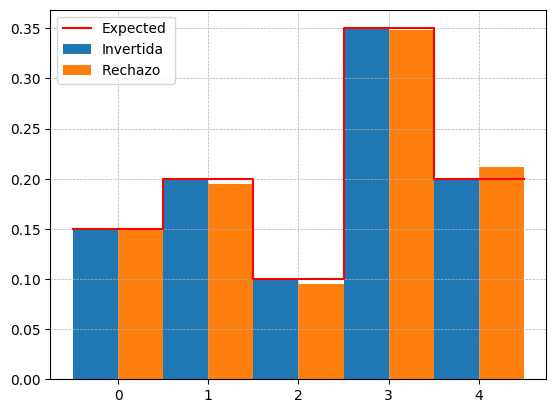

In [5]:
P = [0.15, 0.20, 0.10, 0.35, 0.20]
p_idx = { k: v for k, v in zip(range(len(P)),P)} # Pairs (value, prob)
sort = sorted((p_idx.items()), key = lambda x: x[1], reverse=True) # Sort them by probability
P_ORD = dict(sort)

vars = [
    ('Invertida', var_tinv, [P_ORD]),
    ('Rechazo  ', var_rech, [P_ORD])
]

plot_probs(vars, 10_000)

plot_expected(P)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()